In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
# prompt: write a code to access drive

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=50
BATCH_SIZE=32

In [ ]:
dir_paths = "/content/gdrive/MyDrive/DeepLearning/Data"

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dir_paths,
      # Use 'int' if your folders represent classes with integer labels
     # Optional: Provide class names if you have them
    color_mode='rgb',  # Adjust according to your image color mode
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    shuffle=True,
    seed=42,  # Optional: Set seed for reproducibility

)

Found 2152 files belonging to 3 classes.


In [ ]:
classes=dataset.class_names
classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

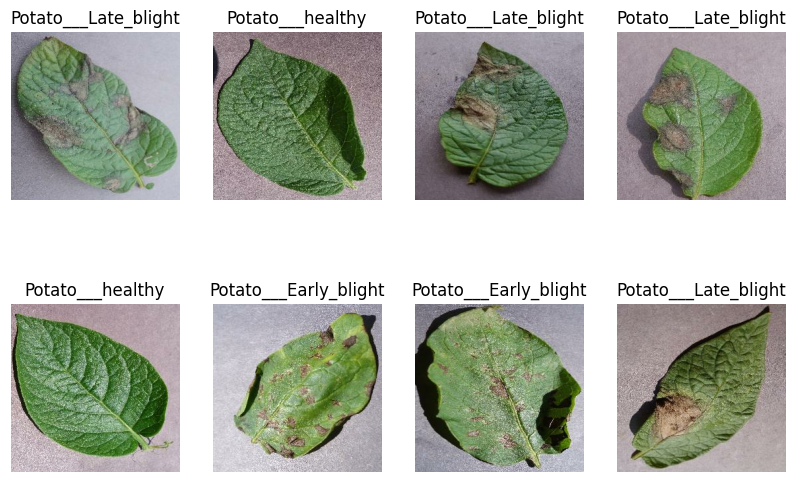

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(8):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(classes[label_batch[i]])
        plt.axis("off")


In [ ]:
def DatasetSplitting(ds,train_split=0.8, val_split=0.1,test_split=0.1, shuffle=True,shuffle_size=10000):

         if shuffle:
                 ds=ds.shuffle(shuffle_size,seed=12)

         train_len =int(len(ds)*train_split)
         test_len =int(len(ds)*test_split)

         train= ds.take(train_len)

         val=ds.skip(train_len)

         test=val.take(test_len)
         val= val.skip(test_len)

         return train, test , val

In [ ]:
train_ds, test_ds , val_ds = DatasetSplitting(dataset)

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
                          layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
                          layers.experimental.preprocessing.Rescaling(1.0/255.0)
])

In [ ]:
data_augmentation =tf.keras.Sequential([
         layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
         layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=3

model=models.Sequential([
     resize_and_rescale,
     data_augmentation,
     layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     layers.Flatten(),
     layers.Dense(64,activation='relu'),
     layers.Dense(n_classes,activation='softmax')

])

model.build(input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history= model.fit(train_ds,epochs=EPOCHS,batch_size=BATCH_SIZE,
                   validation_data=val_ds,verbose=1)

Epoch 1/50
54/54 [==============================] - 822s 198ms/step - loss: 0.9101 - accuracy: 0.4711 - val_loss: 0.8900 - val_accuracy: 0.5781
Epoch 2/50
54/54 [==============================] - 4s 65ms/step - loss: 0.7122 - accuracy: 0.6898 - val_loss: 0.9190 - val_accuracy: 0.6523
Epoch 3/50
54/54 [==============================] - 3s 63ms/step - loss: 0.4496 - accuracy: 0.8038 - val_loss: 0.3994 - val_accuracy: 0.8320
Epoch 4/50
54/54 [==============================] - 3s 63ms/step - loss: 0.3644 - accuracy: 0.8466 - val_loss: 0.3778 - val_accuracy: 0.8281
Epoch 5/50
54/54 [==============================] - 4s 65ms/step - loss: 0.2642 - accuracy: 0.8981 - val_loss: 0.2572 - val_accuracy: 0.8867
Epoch 6/50
54/54 [==============================] - 3s 63ms/step - loss: 0.2476 - accuracy: 0.9005 - val_loss: 0.2104 - val_accuracy: 0.9062
Epoch 7/50
54/54 [==============================] - 3s 64ms/step - loss: 0.2038 - accuracy: 0.9126 - val_loss: 0.1712 - val_accuracy: 0.9375
Epoch 8/50

In [ ]:
model.save('/content/gdrive/MyDrive/DeepLearning/my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


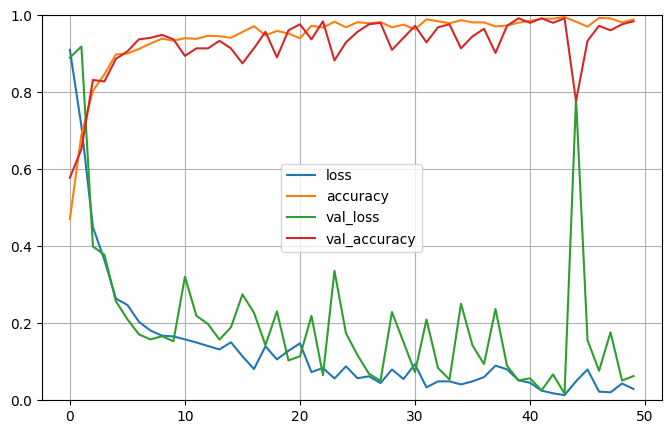

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()